In [1]:
import yfinance as yf

In [2]:
ticker = 'BTC-USD'

data = yf.download(ticker, auto_adjust=True, start = '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
import sys
sys.path.append("../")
sys.path.append("../algo_trader")

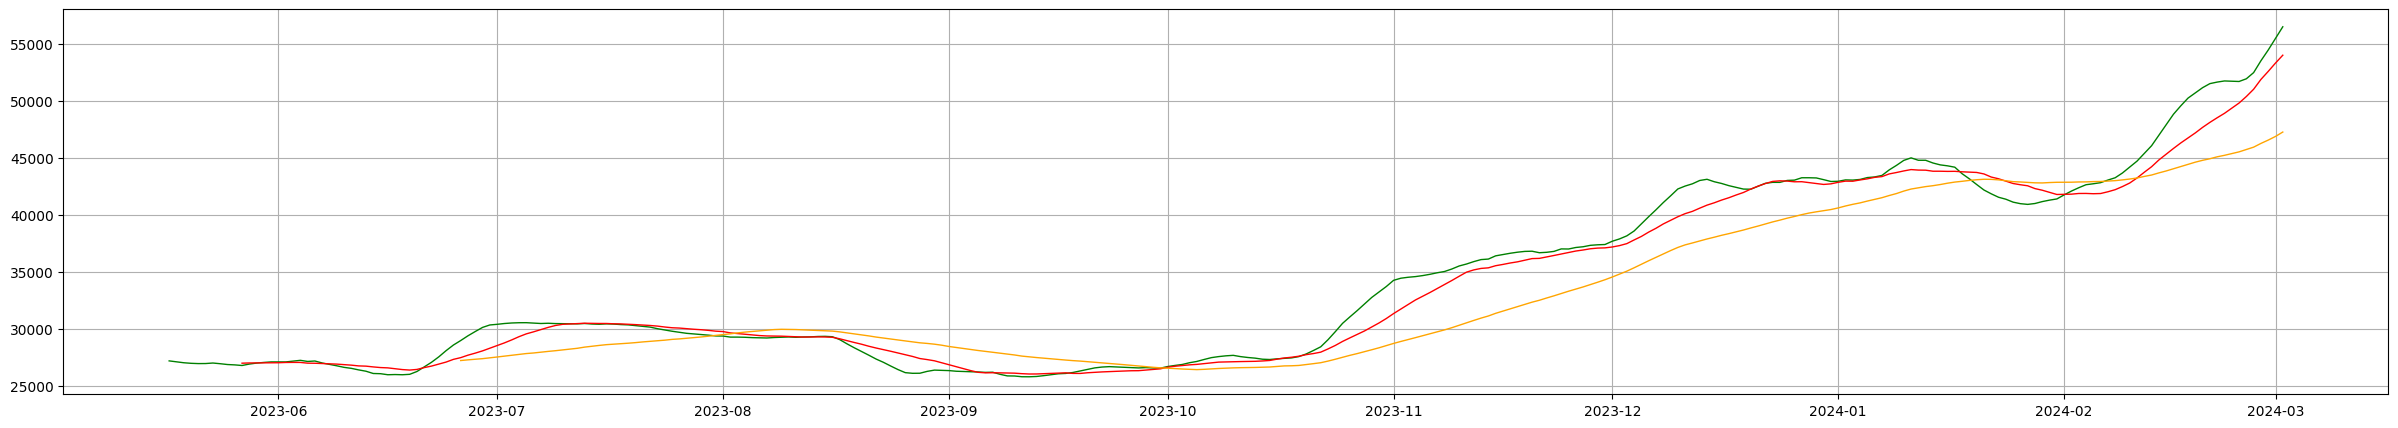

In [4]:
from algo_trader.lib.indicators.threeSma import ThreeSMA

df = data.iloc[-300:]
sma = ThreeSMA(10, 20, 50)
sma.calculate(df)
sma.plot()

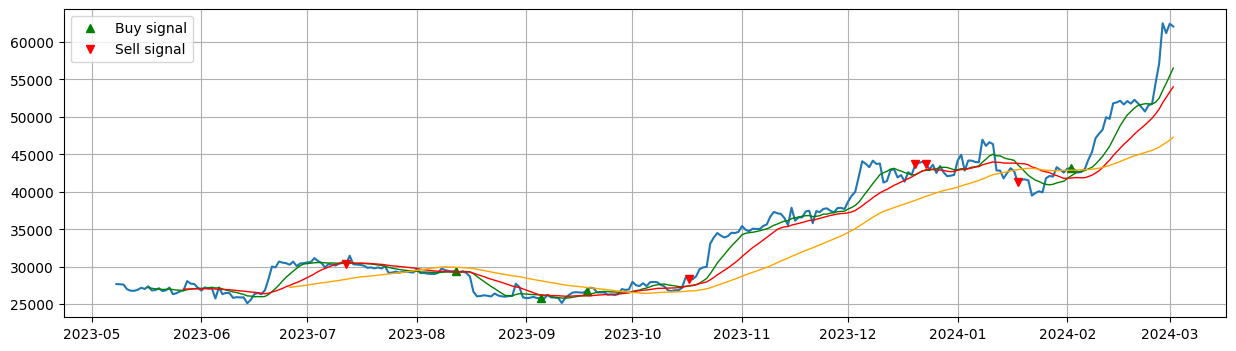

In [5]:
import matplotlib.pyplot as plt

# Armo los dos subgráficos con subplots
# figsize: Es la dimensión de toda la figura, que contiene los subgráficos
# nrows: Es la cantidad de subgráficos
# height_ratios: Se coloca la proporción de alturas entre los subgráficos (la cantidad de elementos debe coincidir con las nrows ingresadas)
fig, ax = plt.subplots(figsize=(15,4), nrows=1, gridspec_kw={'height_ratios' : [1]})

sma_df = sma.calculate(df)
sma_df['buy_signal'] = sma.calc_buy_signals()
sma_df['sell_signal'] = sma.calc_sell_signals()
buySignals = sma_df[sma_df['buy_signal'] == 1]
sellSignals = sma_df[sma_df['sell_signal'] == -1]

ax.plot(sma_df.index, sma_df.Close)
ax.plot(buySignals.index, buySignals.Close, '^', label='Buy signal', color='green')
ax.plot(sellSignals.index, sellSignals.Close, 'v', label='Sell signal', color='red')
ax.legend(loc='upper left')
ax.plot(sma_df.index, sma_df.FAST_SMA, color='green', linewidth=1)
ax.plot(sma_df.index, sma_df.SLOW_SMA, color='red', linewidth=1)
ax.plot(sma_df.index, sma_df.SUPPORT_SMA, color='orange', linewidth=1)
ax.grid()

In [7]:
new_record = data.iloc[-1:]
sma.predict_signal(new_record)

[Three SMA] Current fast SMA value: 57594.24765625
[Three SMA] Current slow SMA value: 54630.204296875
[Three SMA] Current support SMA value: 47668.655
[Three SMA] Signal: Action.HOLD


<Action.HOLD: 'hold'>